# Tarea 3 

## Matías Zúñiga

## P6

Usando `CAMB` se quiere obtener el espectro de potencias de materia usando funciones de transferencia.

In [28]:
import camb 
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# los parámetros a utilizar 
H0 = 67.4 # km/s/Mpc
omega_m = 0.315
omega_ch2 = 0.120
omega_bh2 = 0.0224
ns = 0.965
tau = 0.054

# resultados 
pars = camb.CAMBparams()
pars.set_cosmology(H0=H0, ombh2=omega_bh2, omch2=omega_ch2)
pars.InitPower.set_params(ns=ns)

Note: redshifts have been re-sorted (earliest first)


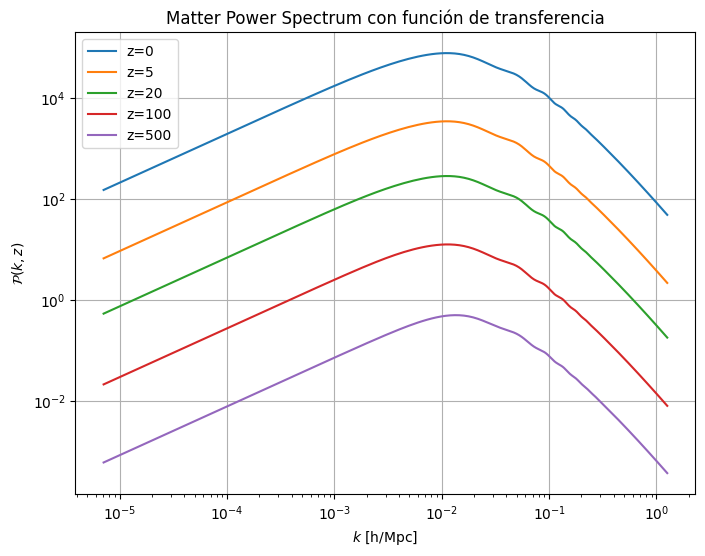

In [ ]:
# redshifts 
redshifts = [0, 5, 20, 100, 500]

matter_power_spectra = {}

for z in redshifts:
    pars.set_matter_power(redshifts=[z])
    results = camb.get_results(pars)
    
    # se obtienen las funciones de transferencia
    trans = results.get_matter_transfer_data()
    
    # se calculan los  k
    k = trans.transfer_data[0, :, 0] * results.Params.h
    
    # se calcula el espectro de potneica
    transfer = trans.transfer_data[camb.model.Transfer_tot-1, :, 0]
    primordial_PK = results.Params.scalar_power(k)
    matter_power = primordial_PK * transfer**2 * k**4 / (k**3 / (2 * np.pi**2))
    
    matter_power_spectra[z] = (k, matter_power)

# se plotea 
plt.figure(figsize=(8, 6))
for z, (k, power) in matter_power_spectra.items():
    plt.loglog(k, power, label=f"z={z}")
plt.title("Matter Power Spectrum con función de transferencia")
plt.xlabel(r"$k$ [h/Mpc]")
plt.ylabel(r"$\mathcal{P}(k, z)$")
plt.legend()
plt.grid()
plt.show()

## P9

## Hands-on-session

### 1. **Explorando sensibilidad de parámetros (Matriz de Fisher)**

**Tarea**: Se quiere modificar el código de la matriz de Fisher para evaluar la sensibilidad de distintos parámetros cosmólogicos (por ejemplo,  $\Omega_m $, $ w_0$, $H_0$). Se quiere comprender cómo los cambios en los datos de entrada influye en la restricción en los parámetros:

- **Ejercicio**:
  - Variar el número de supernovas o su distribución en redshift y observar cómo impacta en la matriz de Fisher.
  - Analizar cómo cambia la incertidumbre en cada parámetro en función de estas variaciones.
  - Graficar los contornos que muestran las regiones de confianza y discutir cuáles parámetros son más sensibles a los cambios.

### 2. **Comparación de modelos cosmólogicos (MCMC)**

**Tarea**: Se quiere correr simulaciones MCMC para distintos modelos cosmólogicos usando la SNIa data (por ejemplo, $\Lambda CDM$ vs. $wCDM$)

- **Ejercicio**:
    - Implementar diferentes priors (uniformes, gaussianos) para parámetros como $w$ y $H_0$ y observar cómo estos priors afectan las distribuciones posteriores.
    - Visualizar las distribuciones posteriores y calcular los intervalos de confianza para cada parámetro.
    - Hacer que los estudiantes comparen la bondad del ajuste y la evidencia bayesiana entre los modelos.

### 3. **Selección de modelo bayesiano y cálculo de evidencia**

**Tarea**: Calcular la evidencia de diferentes modelos cosmológicos utilizando los resultados de MCMC y comparando modelos utilizando el factor de Bayes.

- **Ejercicio**:
    - Usar el resultado de las ejecuciones de MCMC para calcular la evidencia de cada modelo y el correspondiente factor de Bayes.
    - Analizar e interpretar si los datos se ajustan a una constante cosmológica $w=-1$ o $w \neq -1$
    - Discutir cómo las elecciones de los priors influyen en el cálculo de la evidencia.

